<a href="https://colab.research.google.com/github/kamalzada/Gamboo-io_tasks/blob/master/Risk_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run Utility_tools.ipynb

In [65]:
df = pd.read_csv('Risk--Analytics.csv', index_col=[0])  

In [67]:
df.tail()

,income_credit_ratio,have_a_house,have_a_mail,payment
292293,0.460954,1,1,1
292294,0.618375,0,1,1
292295,0.225776,1,1,1
292296,0.462029,1,0,0
292297,0.233333,0,1,1


In [68]:
df.shape

(292298, 4)

In [69]:
#Pre-modeling
x = df.iloc[:,:-1] 
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

'''scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

scaler = RobustScaler()
x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test) '''

'scaler = RobustScaler()\nx_train = scaler.fit_transform(x_train)\nx_train = pd.DataFrame(x_train)\n\nscaler = RobustScaler()\nx_test = scaler.fit_transform(x_test)\nx_test = pd.DataFrame(x_test) '

In [74]:
def get_model_metrics(x_train, y_train, x_test, y_test, preds, mdl):
    
    train_acc = mdl.score(x_train,y_train)
    test_acc = mdl.score(x_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, preds)))
    
    results = {'Train_acc': train_acc, 'Test_acc': test_acc, 'rmse': rmse}
    model = 'Value'
    model_metrics = pd.DataFrame(results.items(), columns = ['Metric', str(model)]).set_index('Metric')
    return model_metrics

In [75]:
def classification_metrics(x_train, y_train, x_test, y_test, preds ,probs ,mdl): #Evaluation Metrics
    Accuracy = accuracy_score(y_test, preds)
    Precision  = precision_score(y_test, preds)
    Recall = recall_score(y_test, preds)

    #Confusion Matrix
    cm = pd.DataFrame(confusion_matrix(y_test, preds, labels=[0,1]))
    TN = cm[0][0]                                                                                       
    FN = cm[0][1]                                                                                          
    FP = cm[1][0]                                                                                       
    TP = cm[1][1]
    TPR = TN/(FP+TN)   
    FPR = FP/(FP+TN)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr )

    logit_summary = {'Accuracy': Accuracy, 
                     'Precision': Precision, 
                     'Recall': Recall, 
                     'True Positive Rate': TPR, 
                     'False Positive Rate': FPR,
                    }
    
    model = 'Value'
    class_metrics = pd.DataFrame(logit_summary.items(), columns = ['Metric', str(model)]).set_index('Metric')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(mdl, x_test, y_test, cmap=plt.cm.Blues, ax=ax)
    plt.tight_layout()
    plt.title('Confusion Matrix', y = 1.1)
    
    return class_metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


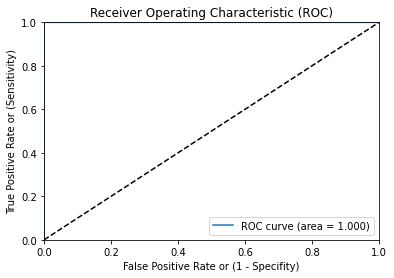

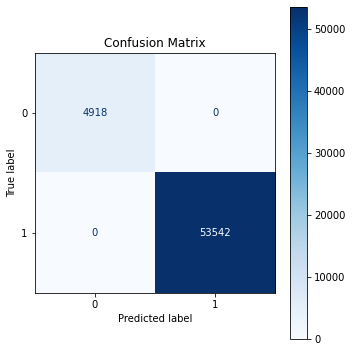

,Metric,Value,Model
0,Train_acc,1.0,Logisitc
1,Test_acc,1.0,Logisitc
2,rmse,0.0,Logisitc
3,Accuracy,1.0,Logisitc
4,Precision,1.0,Logisitc
5,Recall,1.0,Logisitc
6,True Positive Rate,1.0,Logisitc
7,False Positive Rate,0.0,Logisitc


In [76]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
logit_preds = logit.predict(x_test)
logit_probs = logit.predict_proba(x_test)[:,1]
logit_probs2 = logit.predict_proba(x_test)

model_metrics = get_model_metrics(x_train, y_train, x_test, y_test, logit_preds, logit)

class_metrics = classification_metrics(x_train, y_train, x_test, y_test, logit_preds,logit_probs, logit)
y_true = y_test.values

metrics_list = [model_metrics, class_metrics]
lgrmetrics = pd.concat(metrics_list)
lgrmetrics = lgrmetrics.reset_index()
lgrmetrics['Model'] = 'Logisitc'

plt.show();
lgrmetrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


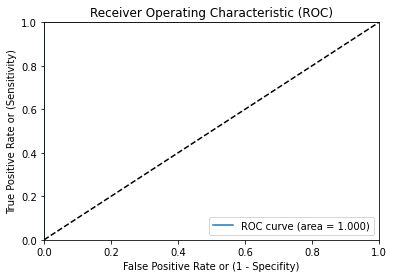

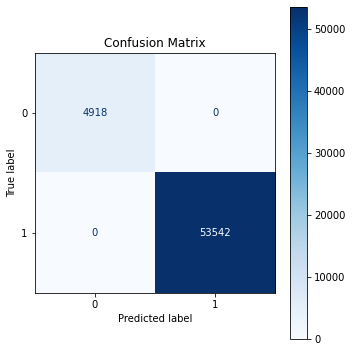

,Metric,Value,Model
0,Train_acc,1.0,Forest
1,Test_acc,1.0,Forest
2,rmse,0.0,Forest
3,Accuracy,1.0,Forest
4,Precision,1.0,Forest
5,Recall,1.0,Forest
6,True Positive Rate,1.0,Forest
7,False Positive Rate,0.0,Forest


In [77]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10)
rfc = rfc.fit(x_train, y_train)
forest_preds = rfc.predict(x_test)
forest_probs = rfc.predict_proba(x_test)[:,1]

model_metrics = get_model_metrics(x_train, y_train, x_test, y_test, forest_preds, rfc)

class_metrics = classification_metrics(x_train, y_train, x_test, y_test, forest_preds, forest_probs, rfc)

metrics_list = [model_metrics, class_metrics]
forest_metrics = pd.concat(metrics_list)
forest_metrics['Model'] = 'Forest'
plt.show();
forest_metrics = forest_metrics.reset_index()
forest_metrics 